# Hack the gap!

## Exploring UK gender pay gap data with Data + Women, London

Tutorial by Christine Dixon April 2019

## Using jupyter:

<font color='green'>Green cell border <font color='black'>means the cell is in 'edit' mode
<br> You can type code in a green cell, then hit <b> shift + enter </b>to execute the code  
<br> To get documentation on a function: hold shift and double-click tab


<br>hit 'esc' to go into 'command' mode <font color='blue'>(blue cell border)<font color='black'>
<br>In command mode: 'a' makes a new cell above; 'b' makes a new cell below

<br>hit 'enter' or click into the cell to return to 'edit' mode

In [87]:
## Quick Python revision:
# A = 9
# B = '9'

## Import packages

this will take a minute.
<br>If the cell has * to the left it is still processing

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Part 1: Import the data and check it

    df = pd.read_csv('file_name.csv')


Once you have a dataframe object, you can <b>do stuff</b> to it using <b>functions</b> (also called methods). 
<br>You can also <b>access information</b> about it using <b>attributes</b>.


Check your dataframe using one of these dataframe <b>methods</b> (the parentheses allow you to feed extra info to the function () ):

    df.head()
    df.tail(2)
    df.sample()
  
In addition to functions, the dataframe class has some useful <b>attributes</b> (these do not need parentheses):

    df.shape
    df.columns
    df.index
    
You can <i>chain</i> attributes and functions together

    df.sample().T

In [178]:
#df = pd.read_csv('UK Gender Pay Gap Data - 2018 to 2019.csv')

In [ ]:
# Take a look at your data using .sample()

## Pause point: if you can't see your data, ask for help here!

## Part 1b (optional): try out some more functions to explore your data


    df.max()
    df.min()
    df.describe()
    df.info()

    df.sort_values()
    
If you want to make the sorted version permanent, you need to assign it back to your variable name

    df = df.sort_values()

## Part 2: how to select using .loc and .iloc

### Pay attention to square brackets! [ ]

A whole column:
  
    df['colname']

A specific cell:

    df.loc[rowname, colname]
    
A specific subset:

    df.loc[[2,4,6],['col1','col2','col3']]
    
df.loc[ ] selects using the names of the rows and columns.<br>

### How is .iloc different?

df.iloc[ ] <i><b>ignores</i></b> the names of the rows and columns and counts up from 0
    
    df.iloc[375, 2]
    

You can use it to take a slice of your dataframe

    df.iloc[3:35, :]
    

<br>

 #### Further reading (advanced):
https://stackoverflow.com/questions/48409128/what-is-the-difference-between-using-loc-and-using-just-square-brackets-to-filte

In [22]:
# Get a list of the columns to help


In [90]:
# Select the 'DiffMedianHourlyPercent' column using square brackets


In [2]:
# use .loc to return row 7681
# then specify the column 'CompanyLinkToGPGInfo'



In [21]:
# Make a new column to get the % female in each quartile
# Hint: use .iloc to select the four %Female columns

In [91]:
# Make a new column to get the % female in each quartile
#df['PercentFemale'] = df.iloc[:,[11,13,15,17]].sum(axis=1)
#df['PercentFemale'] = df['PercentFemale']/4

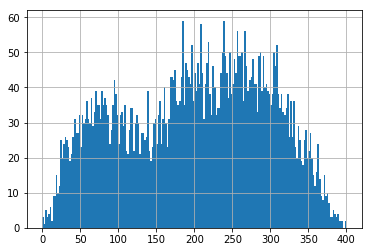

In [58]:
# Make a quick plot with the new column
df['PercentFemale'].hist(bins=200)

## Part 3: Filtering

Step 1:
Write a true/false statement that can be applied to each row in the target column of your data.<br>
<br>You can use operators like >, <, ==, or != (not equal).<br>
It should return a series of 'true/false' values

    df['DiffMeanHourlyPercent'] > 0
    
<br>
Step 2: 
Pass that filter statement to the square brackets of df.loc [ ]. You will now get only the rows where you had 'true'

    df.loc[df['DiffMeanHourlyPercent'] > 0]
    
<br>    
Any expression that results in True/False can be used to filter.<br>
Try using string expressions to find your company
    
    df['EmployerName'].str.contains('Lloyds')
    df['EmployerName'].str.startswith('UCL')


In [ ]:
# Find all the companies with a paygap in favour of women (ie < 0)

In [ ]:
# Try building a filter using a string search


## Part 3b (optional): How does the tech sector compare to other companies?


Use str.contains to make a filter that selects the tech sector SIC codes:

IT:
62020
62090

Software:
58290
62012

You can use the pipe character | to indicate 'or'

    df['SicCodes'].str.contains('62020|62090|58290|62012')

<br>
After writing the filter expression, apply it to the dataframe with .loc, 

    df.loc[df['SicCodes'].str.contains('62020|62090|58290|62012')]
    
Then you can summarise your data, for example with .mean()

    df.loc[df['SicCodes'].str.contains('62020|62090|58290|62012')].mean()
  
  
<br>
Is the pay gap bigger or smaller in the tech industry?
Compare it to non-tech companies by selecting rows where the filter is False

    df['SicCodes'].str.contains('62020|62090|58290|62012') == False
    